In [24]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#split test train
df_test = pd.read_csv('./customer_churn_dataset-testing-master.csv')
df_train = pd.read_csv('./customer_churn_dataset-training-master.csv')

In [26]:
df_test.head(10)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [27]:
df_train.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [28]:
#Data Cleaning
temp_cols = ['Gender', 'Subscription Type', 'Contract Length']

print('\ndf_train: ')
for col in temp_cols: 
    if isinstance(col, str):
        print(df_train[col].unique())
print('NaN values:\n', df_train.isna().sum())
           

print('\ndf_test: ')
for col in temp_cols: 
    if isinstance(col, str):
        print(df_test[col].unique())



df_train: 
['Female' 'Male' nan]
['Standard' 'Basic' 'Premium' nan]
['Annual' 'Monthly' 'Quarterly' nan]
NaN values:
 CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

df_test: 
['Female' 'Male']
['Basic' 'Standard' 'Premium']
['Monthly' 'Annual' 'Quarterly']


In [29]:
df_test.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [30]:
df_train = df_train.dropna(axis=0)

In [31]:
df_train.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [32]:
df_train.shape

(440832, 12)

In [33]:
df_test.shape

(64374, 12)

In [34]:
# separating columns by type
object_cols = df_train.select_dtypes('object').columns
numer_cols = df_train.select_dtypes('number').columns

print('Object columns: \n', object_cols)
print('Numeric columns: \n', numer_cols)

# Convert float columns into int
df_train_numeric = df_train[numer_cols].astype(int).copy()
df_train_str = df_train[object_cols].copy()

df_train = pd.concat([df_train_str, df_train_numeric], axis=1)


Object columns: 
 Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')
Numeric columns: 
 Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
#normalize Numerical Data
df_test_num = sc.fit_transform(df_test[numer_cols])
df_train_num = sc.fit_transform(df_train[numer_cols])

df_test_num = pd.DataFrame(df_test_num,columns=numer_cols)
df_train_num = pd.DataFrame(df_train_num,columns=numer_cols)

#Normalize Categorical data
df_test_cat = pd.get_dummies(df_test[object_cols], columns=object_cols)
df_train_cat = pd.get_dummies(df_train[object_cols], columns=object_cols)

# now we have Gender Male and Gender Female columns, we should drop one
df_test_cat = df_test_cat.drop('Gender_Female', axis=1)
df_train_cat = df_train_cat.drop('Gender_Female', axis=1)

df_test_cat.rename(columns={'Gender_Male': 'Gender'}, inplace=True)
df_train_cat.rename(columns={'Gender_Male': 'Gender'}, inplace=True)

## Concat numeric and categorical data
df_test_norm = pd.concat([df_test_cat, df_test_num], axis = 1)
df_train_norm = pd.concat([df_train_cat, df_train_num], axis = 1)

df_train_norm = df_train_norm.dropna(axis = 0)

## Create common normilized df
temp_test = df_test_norm.copy()
temp_test['is_test'] = 1

temp_train = df_train_norm.copy()
temp_train['is_test'] = 0

df_norm = pd.concat([temp_train, temp_test], axis = 0)

In [36]:
# separating columns by type
object_cols = df_test_norm.select_dtypes('object').columns
numer_cols = df_test_norm.select_dtypes('number').columns

print('Object columns: \n', object_cols)
print('Numeric columns: \n', numer_cols)

# Convert float columns into int
df_test_numeric = df_test_norm[numer_cols].astype(float).copy()
df_test_str = df_test_norm[object_cols].copy()

df_test_norm = pd.concat([df_test_str, df_test_numeric], axis=1)


Object columns: 
 Index([], dtype='object')
Numeric columns: 
 Index(['Gender', 'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Annual',
       'Contract Length_Monthly', 'Contract Length_Quarterly', 'CustomerID',
       'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


<AxesSubplot:>

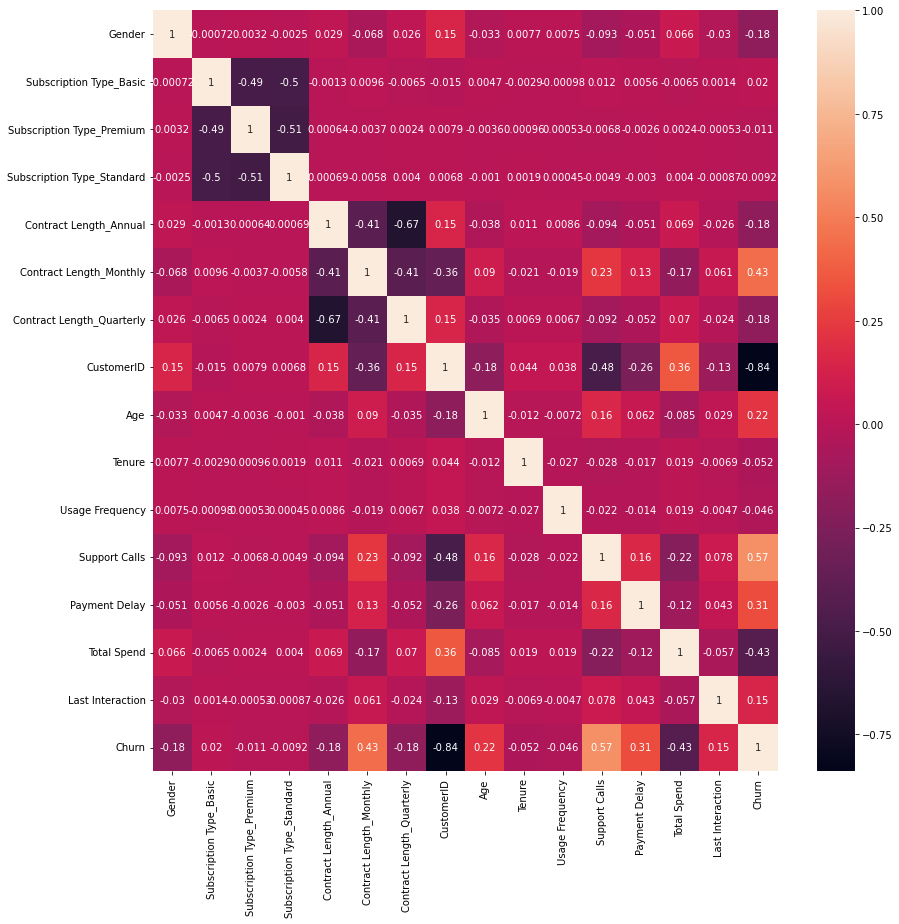

In [37]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
plt.figure(figsize=(14,14))
sns.heatmap(df_train_norm.corr(),annot=True)

In [38]:
cor_var = correlation(df_train_num,0.8)
cor_var

{'Churn'}

# Data Splitting

In [39]:
x_train = df_train_norm.drop(['Churn','CustomerID'], axis = 1 )
y_train = df_train_norm['Churn']
x_test = df_test_norm.drop(['Churn','CustomerID'],axis = 1)
y_test = df_test_norm['Churn']

# Modelling 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [41]:
#create model
base_model = LogisticRegression()
base_model.fit(x_train,y_train)
y_pred = base_model.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.20      0.33     33881
         1.0       0.53      0.99      0.69     30493

    accuracy                           0.57     64374
   macro avg       0.74      0.59      0.51     64374
weighted avg       0.76      0.57      0.50     64374



In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=base_model, n_features_to_select=7)
X_selected = rfe.fit_transform(x_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the selected feature names
selected_feature_names = x_train.columns[selected_feature_indices]

# Fit the model using selected features
base_model.fit(X_selected, y_train)



LogisticRegression()

In [43]:
X_test_selected = rfe.transform(x_test)

y_pred = base_model.predict(X_test_selected)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.20      0.34     33881
         1.0       0.53      0.99      0.69     30493

    accuracy                           0.58     64374
   macro avg       0.74      0.60      0.51     64374
weighted avg       0.75      0.58      0.50     64374



# Refining Model(Feature Selection)

In [46]:
x_train2 = df_train_norm[['Contract Length_Monthly','Contract Length_Quarterly','Support Calls','Payment Delay','Total Spend','Age']]
x_test2 = df_test_norm[['Contract Length_Monthly','Contract Length_Quarterly', 'Support Calls', 'Payment Delay', 'Total Spend','Age']]
refined_model = LogisticRegression(C =1.0, penalty = 'none')
refined_model.fit(x_train2,y_train)
y_pred3 = refined_model.predict(x_test2)

# Evaluate the model
report = classification_report(y_test, y_pred3)
print(report)


              precision    recall  f1-score   support

         0.0       0.96      0.20      0.34     33881
         1.0       0.53      0.99      0.69     30493

    accuracy                           0.58     64374
   macro avg       0.74      0.60      0.51     64374
weighted avg       0.75      0.58      0.50     64374



In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param = {'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']}

random_search = RandomizedSearchCV(base_model, param, cv=5)
random_search.fit(x_train2, y_train)
print("best hyperparameters: ", random_search.best_estimator_)

best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test2)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


best hyperparameters:  LogisticRegression(C=10, class_weight='balanced', solver='saga')
              precision    recall  f1-score   support

         0.0       0.95      0.23      0.37     33881
         1.0       0.53      0.99      0.69     30493

    accuracy                           0.59     64374
   macro avg       0.74      0.61      0.53     64374
weighted avg       0.75      0.59      0.52     64374



In [48]:
x_train.columns

Index(['Gender', 'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Annual',
       'Contract Length_Monthly', 'Contract Length_Quarterly', 'Age', 'Tenure',
       'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend',
       'Last Interaction'],
      dtype='object')

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Define the parameter distribution

# Create the k-NN classifier
rnn = GaussianNB()
rnn.fit(x_train2,y_train)
# Fit the model with the best hyperparameters
y_pred4 = rnn.predict(x_test2)

# Evaluate the model
report = classification_report(y_test, y_pred4)
print(report)

              precision    recall  f1-score   support

         0.0       0.86      0.34      0.48     33881
         1.0       0.56      0.94      0.70     30493

    accuracy                           0.62     64374
   macro avg       0.71      0.64      0.59     64374
weighted avg       0.72      0.62      0.59     64374



In [50]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 5, min_samples_leaf = 4)
DT.fit(x_train2,y_train)
# Fit the model with the best hyperparameters
y_pred4 = DT.predict(x_test2)

# Evaluate the model
report = classification_report(y_test, y_pred4)
print('Decision Tree')
print(report)

Decision Tree
              precision    recall  f1-score   support

         0.0       0.97      0.11      0.19     33881
         1.0       0.50      1.00      0.67     30493

    accuracy                           0.53     64374
   macro avg       0.74      0.55      0.43     64374
weighted avg       0.75      0.53      0.42     64374



# Decision Tree can be chosen for extreme customer retention and for efficient performance naive bayes model can be used.